In [28]:
import json
import pandas as pd
import numpy as np
from collections import Counter
from graphing import time_plot, create_time_plot, cdf, create_cdf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sky-size-with-dups.json'
filep = open(filename, 'r')
entries = []
for line in filep.xreadlines():
    entry = json.loads(line)
    entries.append(entry)
dup_df = pd.DataFrame(entries)

filename = 'sky-size-no-dups.json'
filep = open(filename, 'r')
entries = []
for line in filep.xreadlines():
    entry = json.loads(line)
    entries.append(entry)
df = pd.DataFrame(entries)

df['timestamp'] = pd.to_datetime(df.time, unit='s')
dup_df['timestamp'] = pd.to_datetime(dup_df.time, unit='s')
df['time'] = df['time'].apply(float)
dup_df['time'] = dup_df['time'].apply(float)

print ("{} df entries with columns: {}".format(len(df), df.columns))
print ("{} dup_df entries with columns: {}".format(len(dup_df), dup_df.columns))

79998 df entries with columns: Index([u'comparisons', u'is_dom', u'sky_size', u'time', u'timestamp'], dtype='object')
79998 dup_df entries with columns: Index([u'comparisons', u'is_dom', u'sky_size', u'time', u'timestamp'], dtype='object')


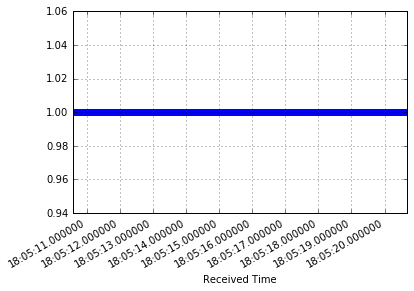

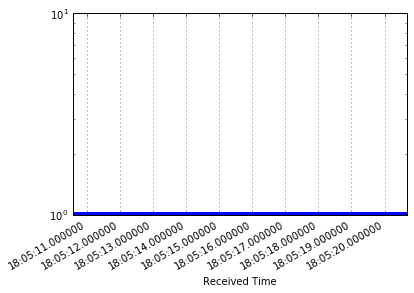

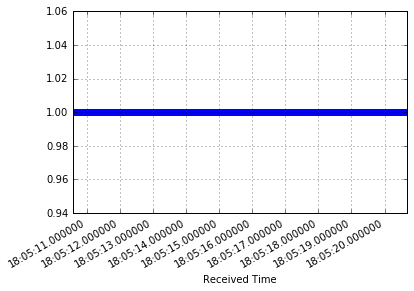

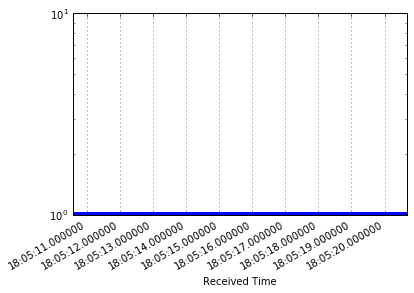

In [25]:

time_plot(df.sky_size, df.timestamps)
time_plot(df.sky_size, df.timestamps, log=True)

time_plot(df.comparisons, df.timestamps)
time_plot(df.comparisons, df.timestamps, log=True)


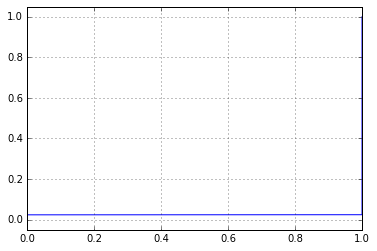

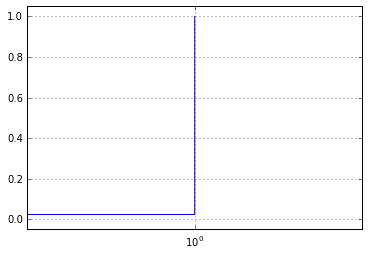

In [19]:
cdf(df.is_dom.values)
cdf(df.is_dom.values, log=True)

now let's explore the size of the skyline as a function of the entry order


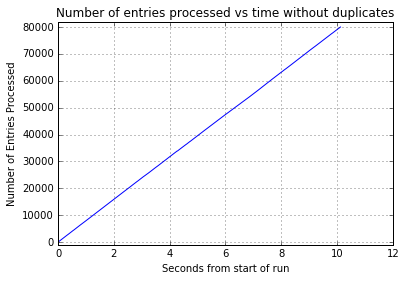

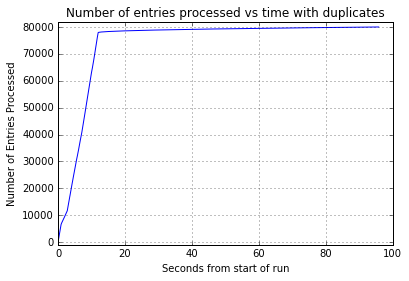

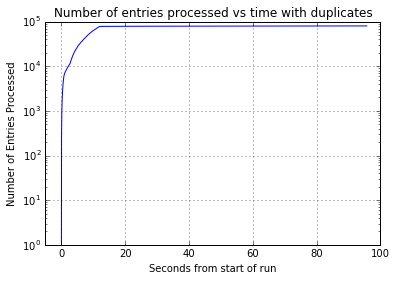

These time plots show that the order is a monotonically increasing function with time, so we did it correctly


In [34]:
print "now let's explore the size of the skyline as a function of the entry order"

df.sort_values(by='timestamp', inplace=True)
df['ones'] = np.ones(len(df))
df['order'] = df.ones.cumsum()
dup_df.sort_values(by='timestamp', inplace=True)
dup_df['ones'] = np.ones(len(dup_df))
dup_df['order'] = dup_df.ones.cumsum()

start = df.timestamp.min()
#print type(start), type(df.timestamp.head(1)[0])

df_start = df['time'].min()
dup_start = dup_df['time'].min()
df['norm_time'] = df['time'].apply(lambda x: x - df_start)
dup_df['norm_time'] = dup_df['time'].apply(lambda x: x - dup_start)

#create_time_plot(df['order'], df['timestamp'], "Number of processed entries",
#                 title="Number of processed entries vs time")
#time_plot(dup_df['order'], dup_df['timestamp'])


#df_small = df.sample(frac=0.00625)
#dup_df_small = dup_df.sample(frac=0.00625)
#from matplotlib.dates import DateFormatter
#formatter = DateFormatter('%M:%S')
fig = plt.figure()
plt.plot(df.norm_time, df.order, markevery=1000)
#plt.plot(df.norm_time, df.order, '-x', color="#1b9e77", label="No dups", markevery=1000)
#plt.plot(dup_df.norm_time, dup_df.order, '-+', color="#d95f02", label="With dups", markevery=1000)
plt.xlabel("Seconds from start of run")
plt.ylabel("Number of Entries Processed")
plt.title("Number of entries processed vs time without duplicates")
#fig.autofmt_xdate()
plt.ylim([-1000, 82000])

plt.grid()
plt.show()

fig = plt.figure()
plt.plot(dup_df.norm_time, dup_df.order, markevery=1000)
plt.xlabel("Seconds from start of run")
plt.ylabel("Number of Entries Processed")
plt.title("Number of entries processed vs time with duplicates")
plt.ylim([-1000, 82000])
plt.grid()
plt.show()

fig = plt.figure()
plt.plot(dup_df.norm_time, dup_df.order, markevery=1000)
plt.xlabel("Seconds from start of run")
plt.ylabel("Number of Entries Processed")
plt.title("Number of entries processed vs time with duplicates")
#plt.xscale('log')
plt.yscale('log')
plt.xlim([-5, 100])
plt.grid()
plt.show()

print ("These time plots show that the order is a monotonically "
       "increasing function with time, so we did it correctly")

Now let's view the size of the skyline at each step in time


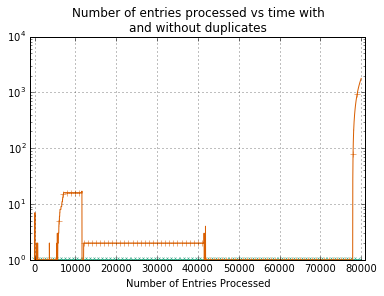

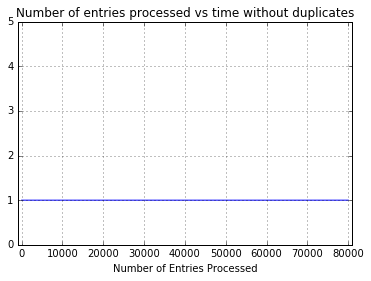

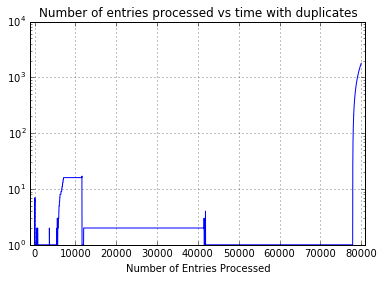

In [23]:
print "Now let's view the size of the skyline at each step in time"

fig = plt.figure()
plt.plot(df.order, df.sky_size, '-x', color="#1b9e77", label="No dups", markevery=1000)
plt.plot(dup_df.order, dup_df.sky_size, '-+', color="#d95f02", label="With dups", markevery=1000)
plt.xlabel("Time")
plt.xlabel("Number of Entries Processed")
plt.title("Number of entries processed vs time with\nand without duplicates")
plt.yscale('log')
plt.ylim([-1000, 10000])
plt.xlim([-1000, 81000])
#fig.autofmt_xdate()
plt.grid()
plt.show()

fig = plt.figure()
plt.plot(df.order, df.sky_size, markevery=1000)
#plt.plot(dup_df.order, dup_df.sky_size, markevery=1000)
plt.xlabel("Time")
plt.xlabel("Number of Entries Processed")
plt.title("Number of entries processed vs time without duplicates")
#plt.yscale('log')
plt.ylim([0, 5])
plt.xlim([-1000, 81000])
#fig.autofmt_xdate()
plt.grid()
plt.show()

fig = plt.figure()
#plt.plot(df.order, df.sky_size, markevery=1000)
plt.plot(dup_df.order, dup_df.sky_size, markevery=1000)
plt.xlabel("Time")
plt.xlabel("Number of Entries Processed")
plt.title("Number of entries processed vs time with duplicates")
plt.yscale('log')
#plt.ylim([-1000, 10000])
plt.xlim([-1000, 81000])
#fig.autofmt_xdate()
plt.grid()
plt.show()